PCA

Метод главных компонент, или PCA (Principal Components Analysis) — это один из базовых способов уменьшения размерности.

In [2]:
from sklearn.decomposition import PCA

In [3]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
dataset = fetch_openml("mnist_784")

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X = dataset['data']
y = dataset['target']

In [6]:
# разделим данные с помощью sklearn на данные для обучения и теста
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [7]:
# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

In [8]:
# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# трансформируем датасеты train_x и test_x
train_x = scaler.transform(X_train)
test_x = scaler.transform(X_test)

In [9]:
# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)

# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [10]:
print(train_x_pca.shape[1])
print(test_x_pca.shape[1])

300
300


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

In [13]:
# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg = LogisticRegression(max_iter=1000)
    start_time = time()
    log_reg.fit(train_x, train_y)
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    delta_time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    return delta_time, score

In [14]:
model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, y_train, test_x_pca, y_test)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 48.679279088974, метрика модели 0.9265714285714286


In [15]:
model_time, model_acc = get_time_and_accuracy(train_x, y_train, test_x, y_test)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

Модель, построенная на всех исходных признаках. Время обучения 193.63742232322693, метрика модели 0.9187142857142857


T-SNE

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

In [1]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

In [12]:
# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
X_reduced = tsne.fit_transform(train_x)

In [14]:
import seaborn as sns
import pandas as pd

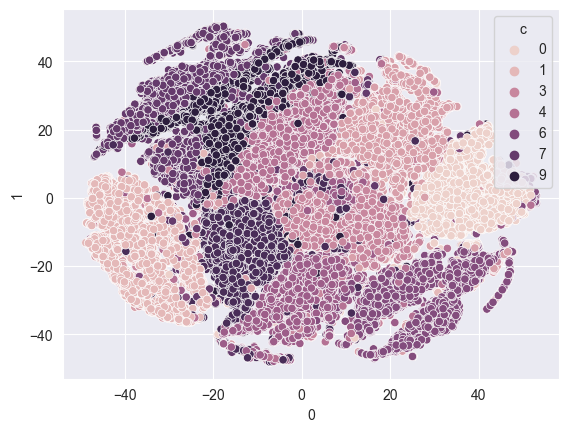

In [17]:
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(y_train).astype('Int64').to_list()
# визуализируем
sns.set_style("darkgrid")
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=df_tsne['c']);